### Brain Atlases

A brain atlas is a labeling of a volume. Each voxel contains a label, instead of a gray value. These labels are numeric. Each number corresponds to a region of interest (ROI).

Why ROIs?
1. Explore the data (see signal in areas of interest plotted for each condition or plotted against other variables of interest)
2. Limit number of statistical tests, controlling for Type I error
3. Limit statistical tests to a region that is functionally defined.

Some of these atlases are also explained here: https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Atlases.

### Comparing Atlases

A full list of nilearn atlases can be found here: http://nilearn.github.io/modules/reference.html#module-nilearn.datasets.  
For questions about which brain atlas to use, a recent [Arslan et al., 2018 paper](https://www.ncbi.nlm.nih.gov/pubmed/28412442) may aid in your search.

### Retrieve the Atlas

Since we're using resting state fMRI data, it makes sense to use an atlas defined using resting state fMRI data.  
For this tutorial, we'll be using a set of parcellations from [Craddock et al., 2012](https://www.ncbi.nlm.nih.gov/pubmed/21769991). This atlas was generated from resting state fMRI data from 41 healthy controls participants. 

In [13]:
import numpy as np
import nibabel as nib
from nilearn import datasets
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
parcel_dir = '../resources/rois/' 

In [14]:
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011(parcel_dir)


Dataset created in ../resources/rois/yeo_2011



Downloaded 2654759 of 2654759 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from ../resources/rois/yeo_2011/a2fde1b0e3db25e49d233ec6cf6ada04/Yeo_JNeurophysiol11_MNI152.zip..... done.


In [16]:
atlas_yeo_2011.keys()

dict_keys(['description', 'thin_7', 'thick_7', 'thin_17', 'thick_17', 'colors_7', 'colors_17', 'anat'])

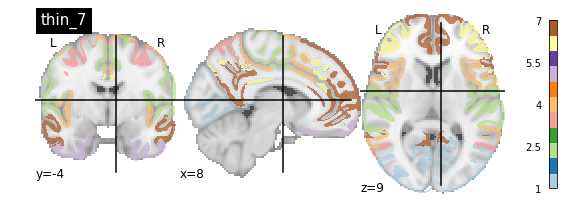

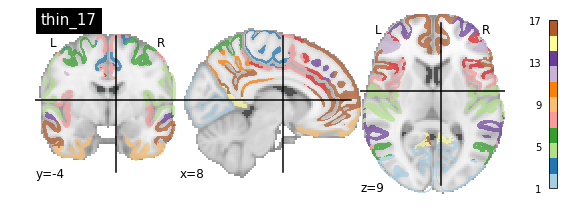

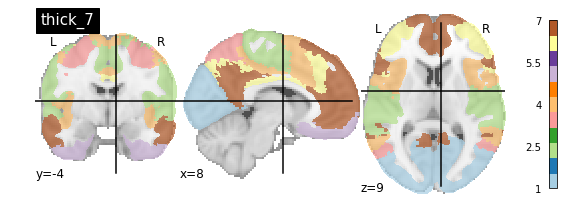

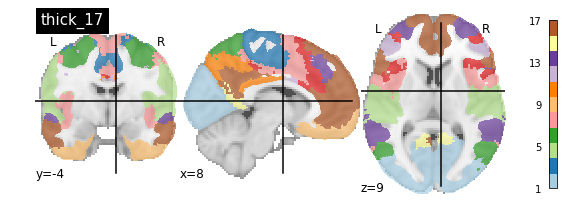

In [45]:
cut_coords=(8, -4, 9)
colorbar=True
cmap='Paired'

plotting.plot_roi(atlas_yeo_2011['thin_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_7')
plotting.plot_roi(atlas_yeo_2011['thin_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_17')
plotting.plot_roi(atlas_yeo_2011['thick_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_7')
plotting.plot_roi(atlas_yeo_2011['thick_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_17')

In [29]:
atlas_yeo = atlas_yeo_2011.thick_7

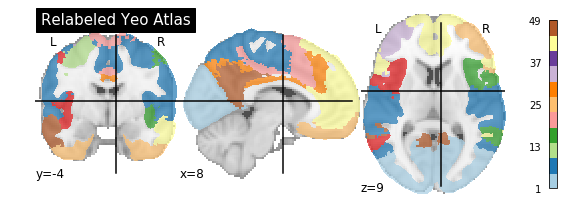

In [33]:
from nilearn.regions import connected_label_regions
region_labels = connected_label_regions(atlas_yeo)
plotting.plot_roi(region_labels,
                  cut_coords=(8, -4, 9),
                  colorbar=True,
                  cmap='Paired',
                  title='Relabeled Yeo Atlas')

In [34]:
region_labels.to_filename('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')

In [37]:
import bids
layout = bids.layout.BIDSLayout('../data/ds000030')
func_file = layout.get(subject='10788', modality='func', type='preproc', extensions='nii.gz', return_type='file')[0]
func_img = nib.load(func_file)
func_img.shape[0:2]

Failed to import duecredit due to No module named 'duecredit'
/scratch/mjoseph/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/scratch/mjoseph/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/scratch/mjoseph/.pyenv/versions/3.6.0/envs/scwg2018_venv/lib/python3.6/site-packages/bids/layout/bids_layout.py:121: ResourceWarning: unclosed file <_io.TextIOWrapper name='/mnt/tigrlab/projects/mjoseph/scwg2018_python_neuroimaging/data/ds000030/dataset_description.json' mode='r' encoding='UTF-8'>
  self.description = json.load(open(target, 'r'))
/scratch/mjoseph/.pyenv/versions/3.6.0/envs/scwg2018_venv/lib/python3.6/site-packages/grabbit/core.py:436: ResourceWarning: unclosed file <_io.TextIOWrapper name='/scra

(65, 77)

In [38]:
region_labels.get_data().shape[0:2]

(256, 256)

In [39]:
mean_func_img = image.mean_img(func_file)

/scratch/mjoseph/.pyenv/versions/3.6.0/envs/scwg2018_venv/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


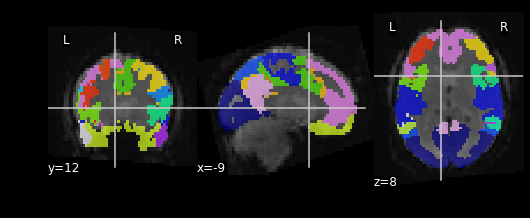

In [40]:
resampled_yeo = image.resample_to_img(region_labels, mean_func_img, interpolation = 'nearest')
plotting.plot_roi(resampled_yeo, mean_func_img)

In [2]:
parcel_dir = '../resources/rois/' 
fetch_atlas = datasets.fetch_atlas_craddock_2012(parcel_dir)

If we look at the dictionary keys for `fetch_atlas`, we can see that the Craddock atlas actually contains 5 different ROI atlases.

In [3]:
fetch_atlas.keys()

dict_keys(['description', 'scorr_mean', 'tcorr_mean', 'scorr_2level', 'tcorr_2level', 'random'])

We'll use the `scorr_mean` atlas (based on spatial correlation) for this tutorial.

Each atlas also contains 44 different volumes which correspond to the level of clustering. 

In [4]:
cc_atlas = image.load_img(fetch_atlas['scorr_mean'])
cc_atlas.shape

/scratch/mjoseph/.pyenv/versions/3.6.0/envs/scwg2018_venv/lib/python3.6/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)


(47, 56, 46, 43)

Let's have a look at that atlas.

Number of parcellations: 205


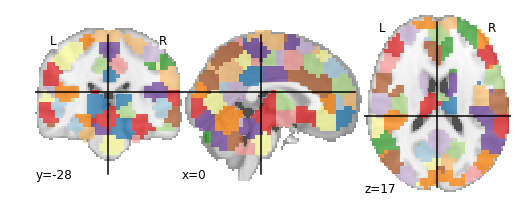

In [8]:
#Index 19, contains the 200 ROI parcellation we want to use
cc200 = cc_atlas.slicer[:, :, :, 20]
plotting.plot_roi(cc200, cmap='Paired')
print('Number of parcellations: ' + str(np.unique(cc200.get_data()).shape[0] -1))

In order to apply the atlas to our fMRI image, we first need to make sure that they have the same dimensions.

In [9]:
func_file = '../data/ds000030/derivatives/fmriprep/sub-10171/func/sub-10171_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'
func_img = nib.load(func_file)
func_img.shape[0:2]

(65, 77)

In [10]:
cc200.get_data().shape[0:2]

(47, 56)

In [11]:
mean_func_img = image.mean_img(func_file)

The dimensions don't match so we'll resample the atlas to match.

/scratch/mjoseph/.pyenv/versions/3.6.0/envs/scwg2018_venv/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


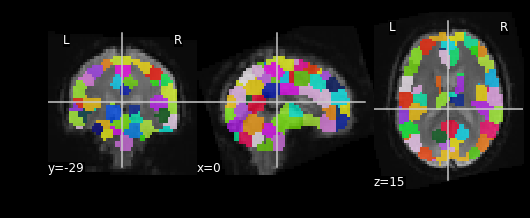

In [12]:
resampled_cc200 = image.resample_to_img(cc200, mean_func_img, interpolation = 'nearest')
plotting.plot_roi(resampled_cc200, mean_func_img)